In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import scipy.fft as sp 
from scipy.fft import fft, fftfreq, fftshift
from math import pi as PI
import math
import cmath
import numpy as np
from scipy import signal
import random as rand
from scipy.fftpack import fft, ifft



def step(x, *args, **kwargs):
    step_from_, step_to_ = args # откуда до куда будут ненулевые значения
                                               # + область определения функции
    print(step_from_, step_to_)
    samples_num = len(x)
    print(samples_num)
    numb_of_pts_within = 0
    
    for x_ in x:
        if step_from_<=x_<=step_to_:
            numb_of_pts_within+=1 # колво точек попадающих в область ступеньки
    
    step_height = 1/numb_of_pts_within
    y = []
    for i in range(0, len(x)):
        if step_from_<=x[i]<=step_to_:
            y.append(step_height)
        else:
            y.append(0)
        
    return y

def meander(x, *args, **kwargs):
    len_ = len(x)
    from_, to_ = args
      
    
    for i in range(0, len_):
        if from_<=x[i]<=to_:
            x[i]= 1
        else:
            x[i] = 0
    return x
   

class FuncParams:
    def __init__(self, from_, to, ampl, omega, shift, N):
        self.From = from_
        self.To = to
        self.Ampl = ampl
        self.Omega = omega
        self.shift = shift
        self.N = N

class Function :
    x = []
    y = []
    
    def __init__(self, FuncParams):
      
       self.From = FuncParams.From
       self.To = FuncParams.To
       self.W = FuncParams.Omega
       self.N = FuncParams.N
       self.Shift = FuncParams.shift
       self.Ampl = FuncParams.Ampl

    def reset_x(self):
       # self.x.clear()
         self.x = np.linspace(self.From, self.To, self.N)

    def calc(self, func, *args, **func_args):
        self.reset_x()
        #for key, val in func_args.items():
         #   print(key, val)
        
        self.y = self.Ampl*func(self.W*(self.x+self.Shift), *args, **func_args)
    def plot(self):
        fig = plt.figure()
        subplot = fig.add_subplot(111)
        subplot.plot(self.x, self.y, 'b', marker='.')
        
        
        fig.show()

    def normalize(self, value):
        len_ = len(self.y)
        for i in range (0, len_):
            self.y[i] = self.y[i]/value

    def noize(self, intensity, level):
        if intensity >=0:
            increment = 1/intensity
            len_ = len(self.y)
            x = 0
            for i in range(0, len_):
                x+=increment
                if(x>=1):
                    x=0
                    self.y[i] += rand.uniform(-level, +level)

    def reverse(self):
        # Вернуть вместо f(t) --> f(-t)
        x_ = list(self.x)
        for i in range (0, len(x_)):
            x_[i] = -x_[i]
        
        x_ = np.sort(x_)
        y_ = list(np.flip(self.y))
        res = Function(FuncParams(self.From, self.To, self.Ampl, self.W, self.Shift, self.N))
        res.x = x_
        res.y = y_
        return res

    def plot_FFT(self):
         # Частотная характеристика окна (Фильтра)
        fft_lib_res = np.fft.fft(self.y)
        spacing_period = (self.From-self.To)/self.N

        xf = fftfreq(self.N, spacing_period)
        lib_res_module = calc_module(fft_lib_res)

        fig = plt.figure()
        subplot = fig.add_subplot(111)
        subplot.set_xlim(0, max(xf))
        subplot.plot(fftshift(xf), abs(fftshift(lib_res_module))/self.N, label='Impulse characteristics')
        subplot.legend()
        fig.show()

    def FFT(self):
        fft_lib_res = np.fft.fft(self.y)
        spacing_period = (self.From-self.To)/self.N

        xf = fftfreq(self.N, spacing_period)
        return [fftshift(xf), fftshift(fft_lib_res)]

    def IFFT(self):
        ifft_y = sp.ifft(self.y)
        #spacing_period = (self.From-self.To)/self.N

        ifft_x = np.linspace(-1, 1, len(ifft_y))
        return [ifft_x, ifft_y]
        
        


'''def calc_and_plot(Filter_Func, Sample_Func, title):
    # Результат фильтра (Свёртка)
    conv = np.convolve(Filter_Func.y, Sample_Func.y)
    x = np.linspace(Sample_Func.From, Sample_Func.To, len(conv))
    #plt.plot(x, conv, color='r')
    
    # Частотная характеристика окна (Фильтра)
    fft_lib_res = np.fft.fft(Filter_Func.y)
    spacing_period = (Filter_Func.From-Filter_Func.To)/Filter_Func.N

    xf = fftfreq(Filter_Func.N, spacing_period)
    lib_res_module = calc_module(fft_lib_res)


    fig = plt.figure()
    fig.suptitle(title)

    # Результат сглаживания 
    subplot = fig.add_subplot(131)
    subplot.plot(Sample_Func.x, Sample_Func.y, color='b', label='Source Signal')
    subplot.plot(x, conv, color='r', label='Smoothened Signal')
    subplot.legend()

    # Фильтр
    subplot = fig.add_subplot(132)
    subplot.plot(Filter_Func.x, Filter_Func.y, color='k', label='Filter Func h(x)', marker='.')
    subplot.legend()

    # Фурье
    subplot = fig.add_subplot(133)
    #subplot.set_xlim(0, max(xf))
    subplot.plot(fftshift(xf), abs(fftshift(lib_res_module))/Filter_Func.N, label='Impulse characteristics')
    subplot.legend()
    
    fig.show()'''


'''def cut_filter(x_fft, y_fft, cut_percent):
    res_y = []
    res_x = []

    middle_idx = int(len(x_fft)/2)
    max_index = int(len(y_fft)*cut_percent / 2)
    
    #print(type(x_fft), type(y_fft))
    #print('lens=', len(x_fft), len(y_fft))
    res_y = y_fft.tolist()[middle_idx - max_index : middle_idx+max_index]
    res_x = x_fft.tolist()[middle_idx - max_index : middle_idx + max_index]
    return [res_x, res_y]'''
    

def plot(x, y, title):
    fig = plt.figure()
    fig.suptitle(title)
    subplot = fig.add_subplot(111)
    
    subplot.plot(x, y, label='plot()')
    subplot.legend()
    fig.show()

def normalize(y, val):
    for i in range(0, len(y)):
        y[i] = y[i]/val
    return y    
    



'''def calc_and_plot_filter(f_cut, filt_len, N_filt_points, src_Func, freq, title):
    # Через аналитическую функцию

    filter_from = -filt_len/2
    filter_to = filt_len/2
    
    x_filt = np.linspace(filter_from, filter_to, N_filt_points)

    # Импульсная характеристика нормированная
    h = 2*f_cut* np.sin(2*np.pi*f_cut*x_filt) / (2*np.pi*f_cut*x_filt) #np.sinc(2*f_cut * x_filt)
    h = normalize(h, max(h))


    # Фильтрование
    y_filtered = np.convolve(src_Func.y, h)
    x_filtered_from = src_Func.From#min(src_Func.From, -filt_len/2)
    x_filtered_to = src_Func.To#max(src_Func.To, filt_len/2)
    x_filtered = np.linspace(x_filtered_from, x_filtered_to, len(y_filtered))
    
    fig = plt.figure()
    fig.suptitle(title)
    
    subplot = fig.add_subplot(133)
    subplot.plot(x_filt, h, label = 'Filter Impulse Characteristics')
    subplot.legend()

    subplot = fig.add_subplot(131)
    #subplot.set_xlim(min(x_filtered_from, src_Func.From), max(x_filtered_to, src_Func.To))
    subplot.plot(x_filtered, y_filtered, 'r--', label='Filtered Signal')
    subplot.legend()

    subplot = fig.add_subplot(132)
    subplot.plot(src_Func.x, src_Func.y, label = 'Source Signal')
    subplot.legend()

    fig.show()'''



"def calc_and_plot_filter(f_cut, filt_len, N_filt_points, src_Func, freq, title):\n    # Через аналитическую функцию\n\n    filter_from = -filt_len/2\n    filter_to = filt_len/2\n    \n    x_filt = np.linspace(filter_from, filter_to, N_filt_points)\n\n    # Импульсная характеристика нормированная\n    h = 2*f_cut* np.sin(2*np.pi*f_cut*x_filt) / (2*np.pi*f_cut*x_filt) #np.sinc(2*f_cut * x_filt)\n    h = normalize(h, max(h))\n\n\n    # Фильтрование\n    y_filtered = np.convolve(src_Func.y, h)\n    x_filtered_from = src_Func.From#min(src_Func.From, -filt_len/2)\n    x_filtered_to = src_Func.To#max(src_Func.To, filt_len/2)\n    x_filtered = np.linspace(x_filtered_from, x_filtered_to, len(y_filtered))\n    \n    fig = plt.figure()\n    fig.suptitle(title)\n    \n    subplot = fig.add_subplot(133)\n    subplot.plot(x_filt, h, label = 'Filter Impulse Characteristics')\n    subplot.legend()\n\n    subplot = fig.add_subplot(131)\n    #subplot.set_xlim(min(x_filtered_from, src_Func.From), max(x_

In [3]:
def plot_fft(y_src, From, To, f_lim):
    fft_lib_res = np.fft.fft(y_src)
    spacing_period = (From-To)/len(y_src)

    xf = fftfreq(len(y_src), spacing_period)
    lib_res_module = calc_module(fft_lib_res)

    fig = plt.figure()
    subplot = fig.add_subplot(111)
    subplot.set_xlim(0, f_lim)
    subplot.plot(fftshift(xf), abs(fftshift(lib_res_module))/len(y_src), label='Impulse characteristics')
    subplot.legend()
    fig.show()

In [4]:
def FIR_low_pass_filter(f_c, f_samp, N):

    if (N%2 != 0):
        print('assume N is odd')
        
    h = [0]*N #  list(N)
   #print(h)
    #Normalize f_c and ω _c so that pi is equal to the Nyquist angular frequency

    f_c = f_c/f_samp

    ω_c = 2*np.pi*f_c

    middle = int(N/2)    #Integer division, dropping remainder
    
    for i in range(int(-N/2), int(N/2)):
    
    
        if (i == 0):
            h[middle] = 2*f_c

        else:
            h[i+middle] = np.sin(ω_c*i)/(np.pi*i)
    #print(h)
    return h



    

In [5]:
def get_points_numb(t_from, t_to, dt):
    return int((t_to - t_from) / dt)

In [6]:
def get_sample_rate(pts_numb, t_from, t_to):
    return int(pts_numb / (t_to - t_from))

In [7]:
def get_filter_coefficients(Func, f_cut, N_filt):
    sample_rate = get_sample_rate(Func.N, Func.From, Func.To)
    h =  FIR_low_pass_filter(f_cut, sample_rate, N)
    return h
    

In [8]:
def prepare_arrs(y_filtered, y_src):
    delta_len = abs(len(y_filtered) - len(y_src))
    y_res = []
    flag = 'second arg'
    if(len(y_src) < len(y_filtered)):
        y_res = list(y_src)
        
    else:
        y_res = list(y_filtered)
        flag = 'first arg'
        
    
    if(delta_len % 2 ==0):
        zeros = np.zeros(delta_len / 2)
        y_res = np.append(np.append(zeros, y_res), zeros)
    else:
        zeros = np.zeros(delta_len // 2)
        zeros_ = np.zeros((delta_len // 2) + 1)
        y_res = np.append(zeros, y_res)
        y_res = np.append(y_res, zeros_)
    
    return [y_res, flag]

In [9]:
def get_diff(y_filtered, y_src):
    [y_res, flag] = prepare_arrs(y_filtered, y_src)
    diff = []
    if (flag == 'first arg'):
    # первый аргумент был меньшей длины
        diff = np.subtract(y_res, y_src)
    else:
        diff = np.subtract(y_res, y_filtered)
    return diff

In [11]:

def plot_filter(y_filtered, src_Func, h_filt):
    fig = plt.figure()
    subplot_func = fig.add_subplot(131)
    subplot_func.plot(src_Func.y, label = 'source')
    subplot_func.legend()
    
    subplot_filtered_func = fig.add_subplot(132)
    subplot_filtered_func.plot(y_filtered, label = 'filtered')
    #subplot_func.plot(y_filtered, label  = 'filtered')
    subplot_filtered_func.legend()
    #subplot_func.legend()
    
    subplot_filt = fig.add_subplot(133)
    subplot_filt.plot(h, label = 'Filter coefficients')
    subplot_filt.legend()
    
    fig.show()

<ipython-input-11-fb4d6549c8c0>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


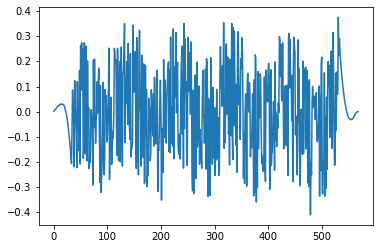

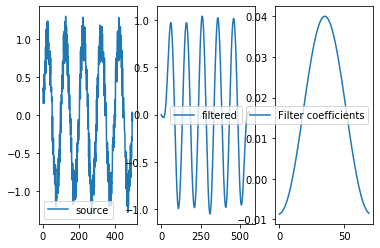

In [12]:
#noizy sin - отнимание частот, оставляем только высокие   
f=1
t_from = 0
t_to = 5
dt = 0.01
points_numb_func = get_points_numb(t_from, t_to, dt)
sample_rate = get_sample_rate(points_numb_func, t_from, t_to)


noize_level=0.3
noize_intensity=0.20
sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, points_numb_func)))
sin_Func.reset_x()
sin_Func.y = np.sin(2*np.pi*f * sin_Func.x)
sin_Func.noize(noize_intensity, noize_level)

f_cut = f*2
N = 70
h = get_filter_coefficients(sin_Func, f_cut, N)


y_filtered = np.convolve(h, sin_Func.y)


# Добить нулями, т.к. из-за свёртки длины чуть разнятся
#[y_res, flag] = prepare_arrs(y_filtered, sin_Func.y)
diff = get_diff(y_filtered, sin_Func.y)


plt.plot(diff)
plot_filter(y_filtered, sin_Func, h)

#plot_fft(sin_Func.y, sin_Func.From, sin_Func.To)
#plot_fft(y_filtered, sin_Func.From, sin_Func.To)
#plot_fft(h, 0,f_cut)

In [13]:
def augment_h(h, Func):
    #print('len h=', len(h))
    len_ = int((len(Func.x) - len(h)) / 2)
    zeros = np.zeros(len_)
    res_h = np.zeros(len_)
    res_h = np.concatenate([res_h, h])
    res_h = np.concatenate([res_h, zeros])
    return res_h

<ipython-input-11-fb4d6549c8c0>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


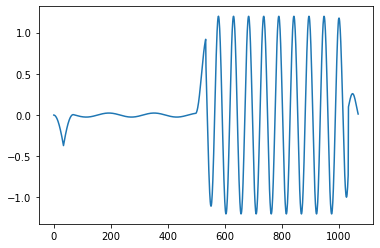

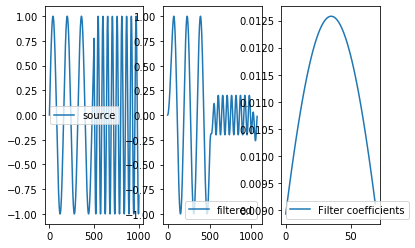

In [14]:
# Пример сначала с обной частотой, потом с другой
points_numb_left = 500
points_numb_right = 500
f_1 = 1
f_2 = 3
t_from = 0
t_middle = np.pi
t_to = 2*np.pi


x = np.linspace(t_from, t_middle, points_numb_left)
y = np.sin(2*np.pi*f_1*x)

x = np.linspace(t_middle, t_to, points_numb_right)
y_temp = np.sin(2*np.pi*f_2*x)
y_concat=np.concatenate([y,y_temp])

Double_freq_func = Function((FuncParams(from_=t_from, to=t_to, ampl=1, omega=1, shift=0, N=points_numb_left+points_numb_right)))

x = np.linspace(t_from, t_to, Double_freq_func.N)
Double_freq_func.x=x
Double_freq_func.y=np.concatenate([y,y_temp])


f_cut = f_1
N_filter = 60
h = get_filter_coefficients(Double_freq_func, f_cut, N_filter)

y_filtered = np.convolve(h, Double_freq_func.y)
y_filtered = normalize(y_filtered, max(y_filtered))

# У фильтра мало точек - добиваем нулями чтоб len(h) == len(Func.x)
h_augmented = augment_h(h, Double_freq_func)

#plot_fft(Double_freq_func.y, Double_freq_func.From, Double_freq_func.To)
#plot_fft(y_filtered, Double_freq_func.From, Double_freq_func.To)
#plot_fft(h_augmented, 0,10, 20)

[y_res, flag] = prepare_arrs(y_filtered, Double_freq_func.y)
diff = get_diff(y_filtered, Double_freq_func.y)


plt.plot(diff)
plot_filter(y_filtered, Double_freq_func, h)


<ipython-input-11-fb4d6549c8c0>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


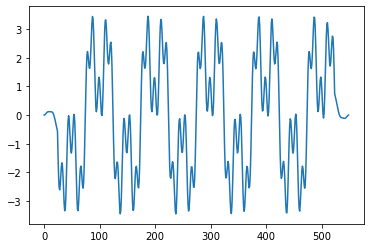

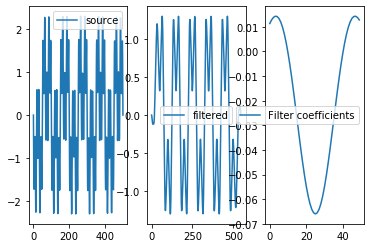

In [18]:
#Сумма синусов  - обрезка самых высоких частот
t_from = 0
t_to = 5
dt = 0.01
N_pts = get_points_numb(t_from, t_to, dt)
sample_rate = get_sample_rate(N_pts, t_to, t_from)
sin_Func = Function((FuncParams(t_to, t_from, 1, 1, 0, N_pts)))
sin_Func.reset_x()
f = 1
f1=f
f2=3*f
f3=9*f
sin_Func.y = np.sin(f * 2 * np.pi * sin_Func.x) + 1*np.sin(f2 * 2 * np.pi * sin_Func.x) +1*np.sin(f3 * 2 * np.pi * sin_Func.x)

f_cut = f2*1.1
N = 50
#h =  FIR_low_pass_filter(f_cut, sample_rate, N)
h = get_filter_coefficients(sin_Func, f_cut, N)
y_filtered = np.convolve(h, sin_Func.y)


len_ = int((len(sin_Func.x) - len(h)) / 2)
zeros = np.zeros(len_)
res_h = np.zeros(len_)
res_h = np.concatenate([res_h, h])
res_h = np.concatenate([res_h, zeros])

diff = get_diff(y_filtered, sin_Func.y)

#plot_fft(sin_Func.y, sin_Func.From, sin_Func.To, 10)
#plot_fft(y_filtered, sin_Func.From, sin_Func.To, 10)
#plot_fft(res_h, 0,f2*1.1, 10)
plt.plot(diff)
plot_filter(y_filtered, sin_Func, h)


<ipython-input-11-fb4d6549c8c0>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


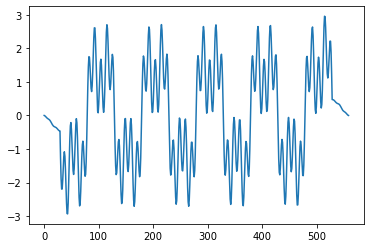

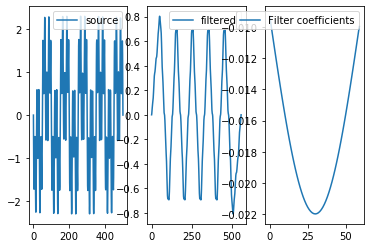

In [20]:
#Сумма синусов  - обрезка самых высоких частот
t_from = 0
t_to = 5
dt = 0.01
N_pts = get_points_numb(t_from, t_to, dt)
sample_rate = get_sample_rate(N_pts, t_to, t_from)
sin_Func = Function((FuncParams(t_to, t_from, 1, 1, 0, N_pts)))
sin_Func.reset_x()
f = 1
f1=f
f2=3*f
f3=9*f
sin_Func.y = np.sin(f * 2 * np.pi * sin_Func.x) + 1*np.sin(f2 * 2 * np.pi * sin_Func.x) +1*np.sin(f3 * 2 * np.pi * sin_Func.x)

f_cut = f1*1.1
N = 60
h =  FIR_low_pass_filter(f_cut, sample_rate, N)

y_filtered = np.convolve(h, sin_Func.y)


len_ = int((len(sin_Func.x) - len(h)) / 2)
zeros = np.zeros(len_)
res_h = np.zeros(len_)
res_h = np.concatenate([res_h, h])
res_h = np.concatenate([res_h, zeros])

diff = get_diff(y_filtered, sin_Func.y)

#plot_fft(sin_Func.y, sin_Func.From, sin_Func.To, 10)
#plot_fft(y_filtered, sin_Func.From, sin_Func.To, 10)
#plot_fft(res_h, 0,f2*1.1, 10)
plt.plot(diff)
plot_filter(y_filtered, sin_Func, h)


In [20]:
def smoothen_filter(filt_src, gauss):
    res = []
    for i in range(len(filt_src)):
        res.append(gauss[i]*filt_src[i])
    return res

In [ ]:
# Ступенечк